In [5]:
## importing packages
import pandas as pd
import numpy as np

In [105]:
# data load and check
Data_url = 'https://cocl.us/datascience_survey_data'
Data=pd.read_csv(Data_url,index_col=0)
Data_col=Data.columns
Data.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [106]:
# sort and calculation of percentage rounded to 2 decimal and then drop of the total column
Data.sort_values('Very interested',ascending=False,inplace=True)
Data['Total']=Data.iloc[:,:len(Data_col)].sum(axis=1)
for col in Data.columns:
   Data[col]=round((Data[col]/Data.iloc[:,len(Data_col)])*100,2)
Data.drop(columns='Total',axis=1,inplace=True)

,Very interested,Somewhat interested,Not interested,Total
Data Analysis / Statistics,77.01,20.26,2.74,100.0
Machine Learning,74.72,21.88,3.39,100.0
Data Visualization,61.58,33.73,4.69,100.0
Big Data (Spark / Hadoop),60.88,33.32,5.80,100.0
Deep Learning,58.23,35.50,6.27,100.0
Data Journalism,20.24,50.99,28.77,100.0


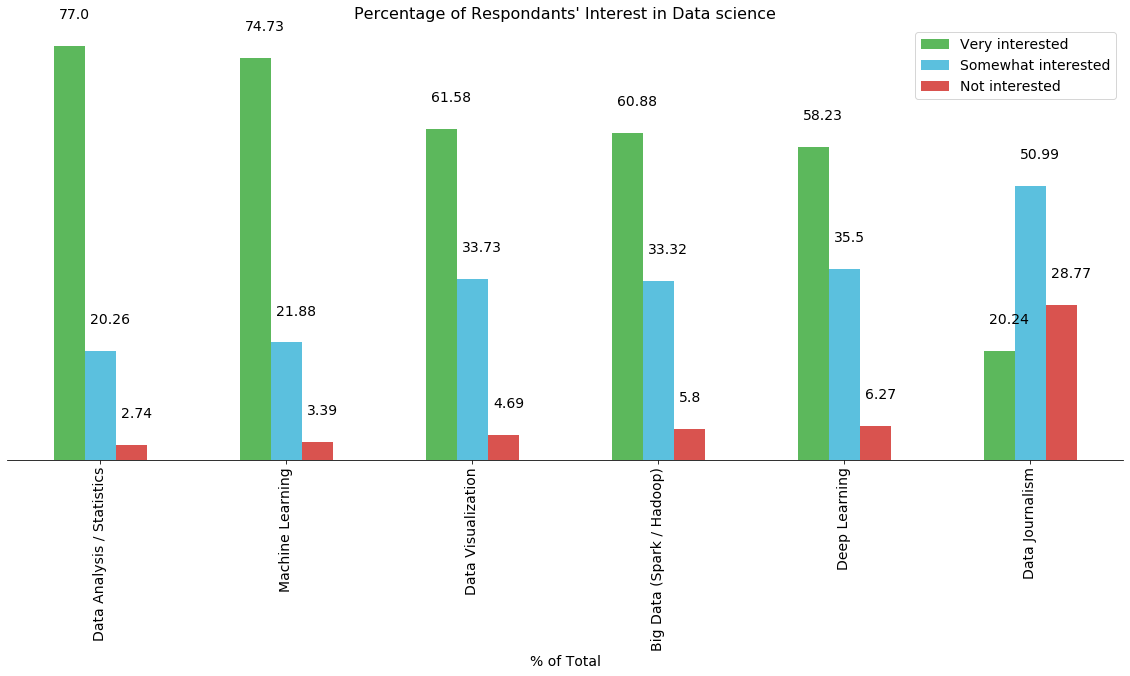

In [156]:
#plot code
import matplotlib as mpl

Data_Bar=Data.plot(kind='bar',
                   figsize=(20,8),
                   color=['#5cb85c','#5bc0de','#d9534f']
                  )

Data_Bar.set_title("Percentage of Respondants' Interest in Data science",fontsize=16)
Data_Bar.set_xlabel('% of Total',fontsize=14)
Data_Bar.set_ylabel('Skills',fontsize=14)
Data_Bar.set_xticklabels(Data.index, fontsize=14)
Data_Bar.spines['right'].set_visible(False)
Data_Bar.spines['left'].set_visible(False)
Data_Bar.spines['top'].set_visible(False)
Data_Bar.axes.get_yaxis().set_visible(False)
Data_Bar.legend(fontsize = 14)

totals = []

for i in Data_Bar.patches:
    totals.append(i.get_height())

tem = []
for i in range(0, 6):
    tem.append(totals[i] + totals[i + 6] + totals[i + 12])

j = 0
for i in Data_Bar.patches:
    if j == 6:
        j = 0
    t = round((i.get_height() / tem[j])*100, 2)
    Data_Bar.text(i.get_x() + 0.03, i.get_height() + 5, str(t), fontsize = 14, color='black')
    j += 1

,Very interested,Somewhat interested,Not interested,Total
Data Analysis / Statistics,77.01,20.26,2.74,100.0
Machine Learning,74.72,21.88,3.39,100.0
Data Visualization,61.58,33.73,4.69,100.0
Big Data (Spark / Hadoop),60.88,33.32,5.80,100.0
Deep Learning,58.23,35.50,6.27,100.0
Data Journalism,20.24,50.99,28.77,100.0


In [33]:
# data load and check
Data_url = 'https://cocl.us/sanfran_crime_dataset'
Data=pd.read_csv(Data_url,index_col=0)
Data.rename(columns={'PdDistrict':'Neighborhoods'},  inplace = True)
Data_crime = Data['Neighborhoods'].value_counts()
Data_crime = pd.DataFrame(Data_crime)
Data_crime.rename(columns={'Neighborhoods':'Count'},  inplace = True)
Data_crime.index.name='Neighborhoods'
Data_crime.reset_index(inplace=True)
Data_crime.sort_index(axis = 1, level = 'Neighborhoods', inplace = True, ascending = False)
Data_crime

,Neighborhoods,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [35]:
import seaborn as srn
import folium

#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/san-francisco.geojson -O san-francisco.geojson
    
print('JSON file downloaded!')

world_geo = r'san-francisco.json'

threshold_scale = np.linspace(Data_crime['Count'].min(), Data_crime['Count'].max(), 6, dtype=int)

world_map = folium.Map(location=[37.77,-122.42], zoom_start = 12)

world_map.choropleth(
    geo_data = world_geo,
    data = Data_crime,
    columns = ['Neighborhoods', 'Count'],
    #key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd', 
    fill_opacity  =0.7, 
    line_opacity = 0.2,
    legend_name = 'Crime Rate in San Francisco')
world_map

JSON file downloaded!


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
help(sf_geo)

No Python documentation found for 'san-francisco.json'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [37]:
!wget https://github.com/MrinmoiHossain/Online-Courses-Learning/blob/master/Coursera/Data%20Visualization%20with%20Python-IBM/Week-3/Assignment/Choropleth_map.ipynb

--2020-04-11 19:00:38--  https://github.com/MrinmoiHossain/Online-Courses-Learning/blob/master/Coursera/Data%20Visualization%20with%20Python-IBM/Week-3/Assignment/Choropleth_map.ipynb
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Choropleth_map.ipynb.1’

Choropleth_map.ipyn     [ <=>                ]  72.60K  --.-KB/s    in 0.03s   

2020-04-11 19:00:39 (2.03 MB/s) - ‘Choropleth_map.ipynb.1’ saved [74340]

